In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nurse_plant_temperatures_all_locations.csv', index_col = 0)

In [3]:
df.time = pd.to_datetime(df.time)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77946 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      77946 non-null  datetime64[ns]
 1   temp      77946 non-null  float64       
 2   sensor    77946 non-null  object        
 3   plant     77946 non-null  object        
 4   location  77946 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.6+ MB


In [5]:
df['month'] = df.time.dt.month
df['hour'] = df.time.dt.hour 
df['minute'] = df.time.dt.minute

In [6]:
df.minute.value_counts()

minute
0     66790
30    11155
20        1
Name: count, dtype: int64

In [7]:
df = pd.DataFrame(df[df.minute == 0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66790 entries, 5 to 3997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      66790 non-null  datetime64[ns]
 1   temp      66790 non-null  float64       
 2   sensor    66790 non-null  object        
 3   plant     66790 non-null  object        
 4   location  66790 non-null  object        
 5   month     66790 non-null  int32         
 6   hour      66790 non-null  int32         
 7   minute    66790 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 3.8+ MB


In [8]:
df.drop(columns = 'minute', inplace = True)

In [9]:
df.reset_index(drop = True, inplace = True)

In [10]:
total_mean_df = df.groupby(['plant', 'hour']).temp.mean().reset_index()

In [11]:
means_df = df.groupby('plant').temp.mean().reset_index()
means_df.rename(columns = {'temp' : 'mean_temp'}, inplace = True)

In [12]:
total_df = total_mean_df.merge(means_df, left_on = 'plant', right_on = 'plant')
total_df['adjusted_mean'] = total_df.temp - total_df.mean_temp

In [13]:
total_df.head()

,plant,hour,temp,mean_temp,adjusted_mean
0,A. deltoidea,0,18.965978,22.105414,-3.139436
1,A. deltoidea,1,18.389043,22.105414,-3.716371
2,A. deltoidea,2,17.790569,22.105414,-4.314846
3,A. deltoidea,3,17.249237,22.105414,-4.856177
4,A. deltoidea,4,16.675694,22.105414,-5.429720


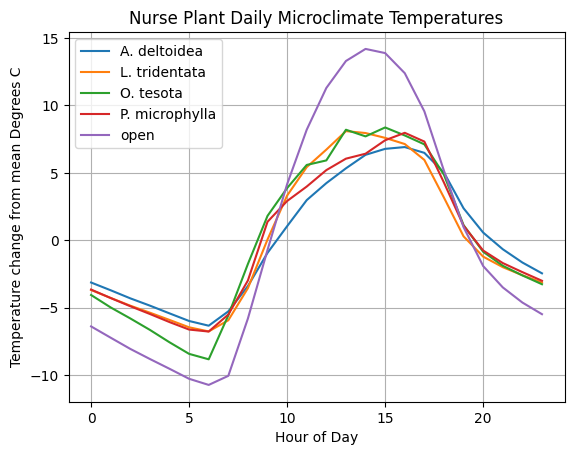

In [14]:
plt.plot(total_df[total_df.plant == 'A. deltoidea'].hour, total_df[total_df.plant == 'A. deltoidea'].adjusted_mean, label = 'A. deltoidea')
plt.plot(total_df[total_df.plant == 'L. tridentata'].hour, total_df[total_df.plant == 'L. tridentata'].adjusted_mean, label = 'L. tridentata')
plt.plot(total_df[total_df.plant == 'O. tesota'].hour, total_df[total_df.plant == 'O. tesota'].adjusted_mean, label = 'O. tesota')
plt.plot(total_df[total_df.plant == 'P. microphylla'].hour, total_df[total_df.plant == 'P. microphylla'].adjusted_mean, label = 'P. microphylla')
plt.plot(total_df[total_df.plant == 'open'].hour, total_df[total_df.plant == 'open'].adjusted_mean, label = 'open')
plt.legend()
plt.grid()
plt.ylabel('Temperature change from mean Degrees C')
plt.xlabel('Hour of Day')
plt.title('Nurse Plant Daily Microclimate Temperatures')
plt.show()

In [15]:
open_df = pd.DataFrame(df[df.plant == 'open'])
open_df.drop(columns = ['month', 'hour', 'plant', 'sensor'], inplace = True)
open_df.rename(columns = {'temp' : 'open_temp'}, inplace = True)
open_df = open_df.groupby(['time', 'location']).mean().reset_index()

In [16]:
merged_df = df.merge(open_df, left_on = ['time', 'location'], right_on = ['time', 'location'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       66761 non-null  datetime64[ns]
 1   temp       66761 non-null  float64       
 2   sensor     66761 non-null  object        
 3   plant      66761 non-null  object        
 4   location   66761 non-null  object        
 5   month      66761 non-null  int32         
 6   hour       66761 non-null  int32         
 7   open_temp  66761 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 3.6+ MB


In [17]:
merged_df['temp_diff'] = merged_df.temp - merged_df.open_temp

In [18]:
merged_df[merged_df.plant == 'open'].temp_diff.min()

np.float64(-11.533333333333331)

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       66761 non-null  datetime64[ns]
 1   temp       66761 non-null  float64       
 2   sensor     66761 non-null  object        
 3   plant      66761 non-null  object        
 4   location   66761 non-null  object        
 5   month      66761 non-null  int32         
 6   hour       66761 non-null  int32         
 7   open_temp  66761 non-null  float64       
 8   temp_diff  66761 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(3)
memory usage: 4.1+ MB


In [20]:
df.head()

,time,temp,sensor,plant,location,month,hour
0,2023-01-02 16:00:00,13.4,open2,open,black canyon,1,16
1,2023-01-02 17:00:00,11.5,open2,open,black canyon,1,17
2,2023-01-02 18:00:00,9.9,open2,open,black canyon,1,18
3,2023-01-02 19:00:00,8.9,open2,open,black canyon,1,19
4,2023-01-02 20:00:00,8.3,open2,open,black canyon,1,20


In [21]:
loc_df = df.groupby(['location', 'plant', 'hour']).temp.mean().reset_index()

In [22]:
loc_df.head()

,location,plant,hour,temp
0,Cottonwood Creek,A. deltoidea,0,31.114286
1,Cottonwood Creek,A. deltoidea,1,29.977143
2,Cottonwood Creek,A. deltoidea,2,28.840952
3,Cottonwood Creek,A. deltoidea,3,27.875238
4,Cottonwood Creek,A. deltoidea,4,26.929524


In [23]:
loc_df.shape

(384, 4)

In [24]:
loc_means = loc_df.groupby(['location', 'plant']).temp.mean().reset_index()
loc_means.rename(columns = {'temp' : 'mean_temp'}, inplace = True)
loc_means.head()

,location,plant,mean_temp
0,Cottonwood Creek,A. deltoidea,36.945754
1,Cottonwood Creek,P. microphylla,35.929286
2,Cottonwood Creek,open,38.493452
3,White Tank Mountains,A. deltoidea,30.153144
4,White Tank Mountains,L. tridentata,30.246831


In [25]:
loc_df = loc_df.merge(loc_means, left_on = ['location', 'plant'], right_on = ['location', 'plant'])

In [26]:
loc_df['temp_diff'] = loc_df.temp - loc_df.mean_temp

In [27]:
loc_df.location.value_counts()

location
White Tank Mountains    120
black canyon             96
wickenburg               96
Cottonwood Creek         72
Name: count, dtype: int64

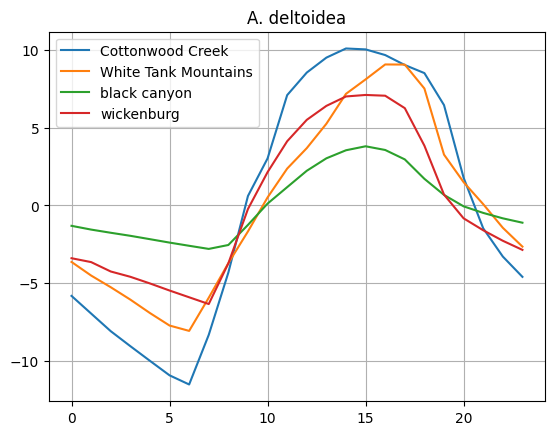

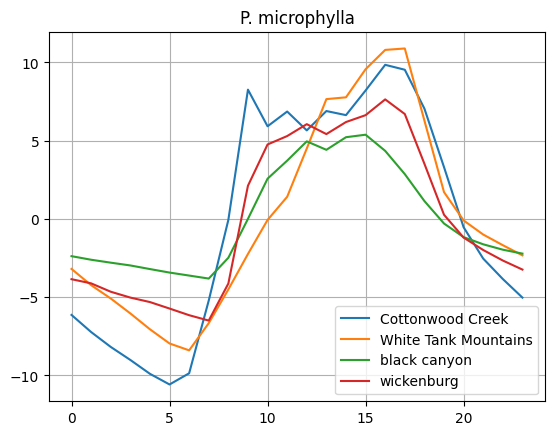

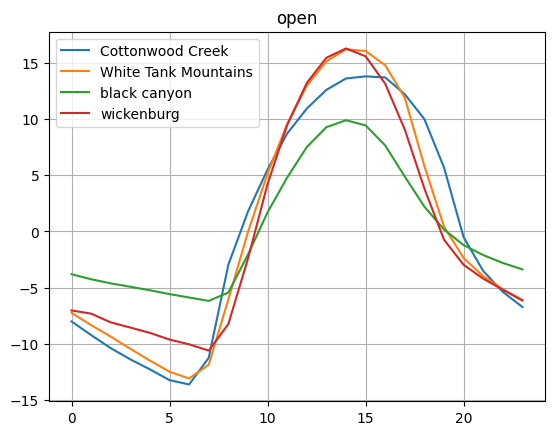

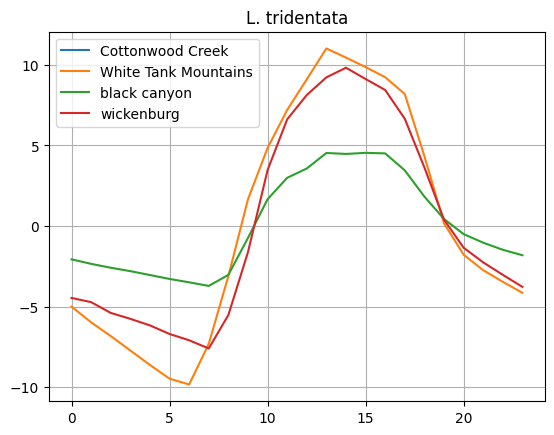

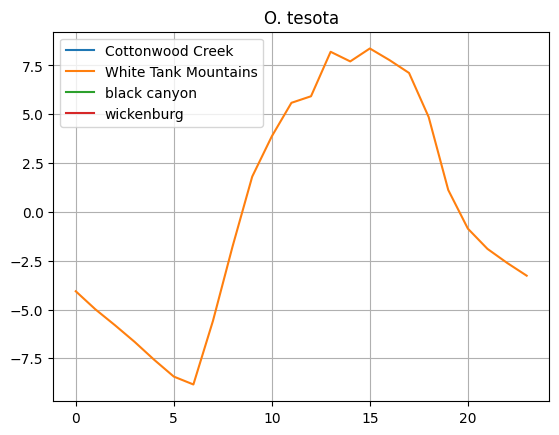

In [28]:
for j in loc_df.plant.unique():
    for i in loc_df.location.unique():
        plt.plot(loc_df[(loc_df.plant == j) & (loc_df.location == i)].hour , loc_df[(loc_df.plant == j) & (loc_df.location == i)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

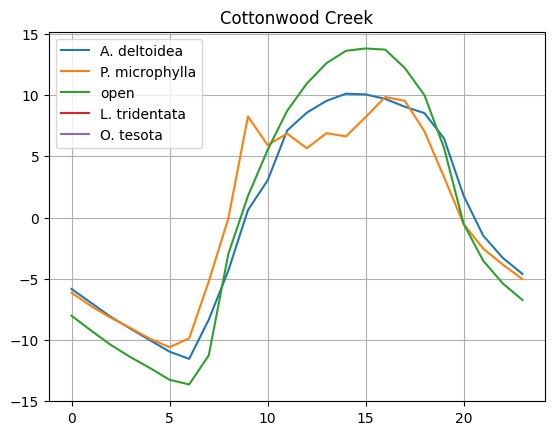

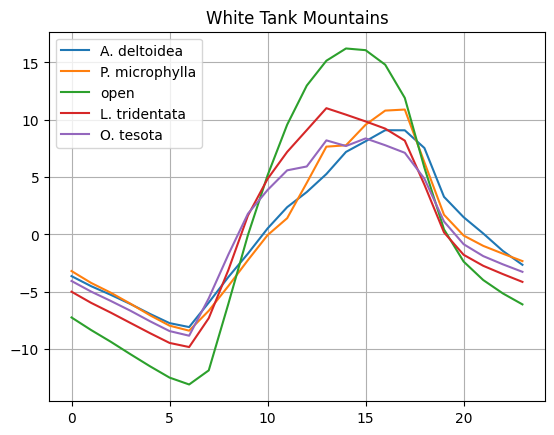

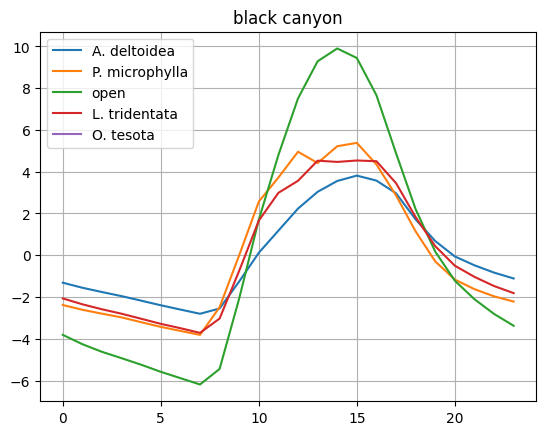

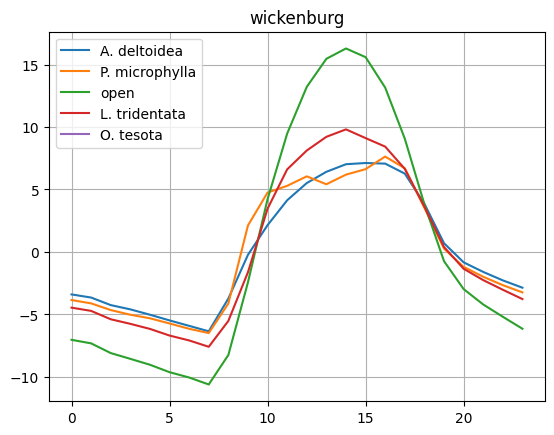

In [29]:
for j in loc_df.location.unique():
    for i in loc_df.plant.unique():
        plt.plot(loc_df[(loc_df.plant == i) & (loc_df.location == j)].hour , loc_df[(loc_df.plant == i) & (loc_df.location == j)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

In [30]:
for i in df.location.unique():
    print(i, 'first time:', df[df.location == i].time.min(), 'Last time:', df[df.location == i].time.max())
    print()

black canyon first time: 2023-01-02 16:00:00 Last time: 2023-03-25 00:00:00

Cottonwood Creek first time: 2025-06-07 08:00:00 Last time: 2025-07-12 08:00:00

wickenburg first time: 2022-02-12 13:00:00 Last time: 2022-03-15 16:00:00

White Tank Mountains first time: 2022-03-18 00:00:00 Last time: 2022-06-09 00:00:00



In [31]:
df.time.dt.dayofyear.nunique()

192

In [32]:
 df[df.temp == df.temp.max()]

,time,temp,sensor,plant,location,month,hour
42875,2022-06-08 13:00:00,68.6,open2,open,White Tank Mountains,6,13


In [33]:
 df[df.temp == df.temp.min()]

,time,temp,sensor,plant,location,month,hour
27370,2022-02-24 07:00:00,-1.0,open1,open,wickenburg,2,7
28114,2022-02-24 07:00:00,-1.0,open2,open,wickenburg,2,7


In [34]:
winter = pd.DataFrame(df[df.month.isin([1, 2])])
summer = pd.DataFrame(df[df.month.isin([6, 7])])

In [35]:
summer.shape

(10165, 7)

In [36]:
winter.shape

(20031, 7)

In [37]:
w_mean = winter.temp.mean()
s_mean = summer.temp.mean()

In [38]:
summer_means = summer.groupby(['plant', 'hour']).temp.mean().reset_index()
winter_means = winter.groupby(['plant', 'hour']).temp.mean().reset_index()

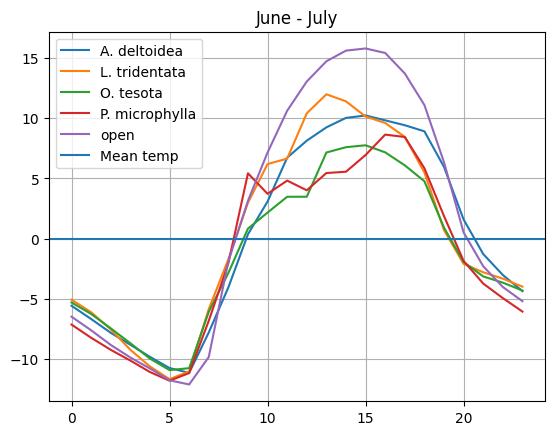

In [41]:
for i in summer_means.plant.unique(): 
    plt.plot(summer_means[summer_means.plant == i].hour, summer_means[summer_means.plant == i].temp - s_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('June - July')
plt.legend()
plt.show()

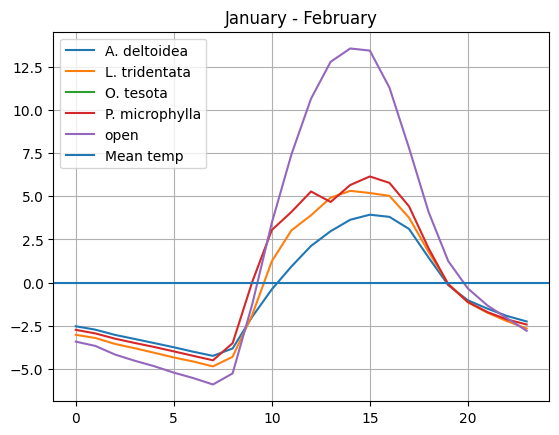

In [42]:
for i in summer_means.plant.unique(): 
    plt.plot(winter_means[winter_means.plant == i].hour, winter_means[winter_means.plant == i].temp - w_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('January - February')
plt.legend()
plt.show()